# Data set resource
- https://github.com/udacity/CarND-Vehicle-Detection
- http://www.gti.ssr.upm.es/data/Vehicle_database.html
- http://www.cvlibs.net/datasets/kitti/

In [33]:
# Load imports
import numpy as np
import cv2
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
import glob
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [12]:
# Import training dataset of vehicle/non-vehicles
car = glob.glob('data/car/**/*.png')
no_car = glob.glob('data/no car/**/*.png')

In [13]:
len(car)

8792

In [14]:
len(no_car)

8968

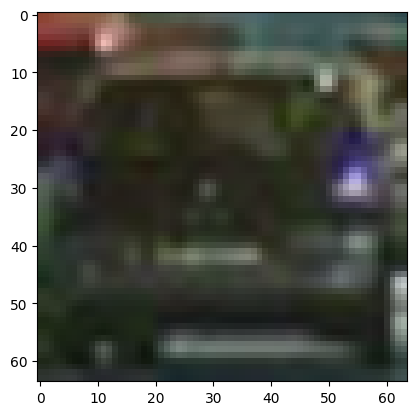

In [15]:
image_color = cv2.imread(car[300])
plt.imshow(image_color)

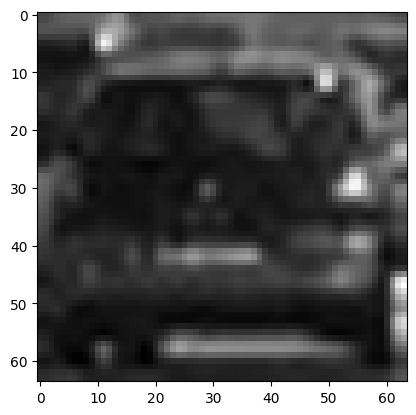

In [16]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')

In [10]:
# Get HOG Features for all training data
'''
HOG stands for Histogram of Oriented Gradients. 
It's a feature descriptor used for object detection and image analysis. 
The primary goal of HOG is to detect objects, particularly by identifying their shape or structure.
'''
car_hog_accum = []

for i in car:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    car_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
                
    car_hog_accum.append(car_hog_feature)



In [19]:
X_car = np.vstack(car_hog_accum).astype(np.float64)  

In [20]:
y_car = np.ones(len(X_car))

In [23]:
nocar_hog_accum = []

for i in no_car:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    nocar_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
                
    nocar_hog_accum.append(nocar_hog_feature)



In [24]:
X_nocar = np.vstack(nocar_hog_accum).astype(np.float64)

In [25]:
y_nocar = np.zeros(len(X_nocar))

In [26]:
X = np.vstack((X_car, X_nocar))
X.shape

(26552, 396)

In [27]:
y = np.hstack((y_car, y_nocar))
y.shape

(26552,)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [29]:
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)

LinearSVC()

<Axes: >

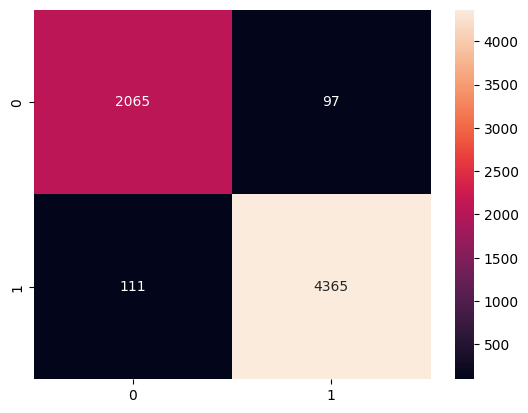

In [30]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt ="d")

In [31]:
Model_prediction = svc_model.predict(X_test[0:50])
Model_prediction

array([0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.])

# Test the model

In [ ]:
test_image = mpimg.imread()